## Le notebook suivant est une reprise du code de Stefan Jansen avec des modifications et des variantes simplificatrices ainsi que des explications détaillées. Si vous souhaitez accéder aux ressources de Stefan Jansen vous devrez vous procurer son livre version papier ou online, payant , et vous pourrez accéder à ses répertoires de code et explications en Anglais

Voici une vidéo en Anglais qui explique très bien le concept de régression linéaire, Josh Starmer est un excellent pédagogue, il est tellement bon qu'il est possible que vous compreniez mieux sa vidéo en Anglais que n'importe quelle autre vidéo en Français, toutefois à vous de rechercher d'autre vidéos simples sur le concept pour améliorer votre compréhension
https://www.youtube.com/watch?v=PaFPbb66DxQ&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU

In [1]:
import warnings
warnings.filterwarnings('ignore')
# On commence par importer des modules de code qui nous permettent d'éviter de nous 
# signaler certaines erreurs parfois lourdre s'il y en a dans notre code

In [73]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Ici nous avons importé toutes les librairies de code qui nous permettrons de manier du data
# numpy est utilie à la création de tableaux, pandas à la mise en forme et manipulation de dataframes
# matplotlib pour dessiner certains graphiques, seaborn aussi pour les graphiques, sklearn pour
# utiliser la régression linéaire, statsmodels pour les estimations statistiques, mpl_toolkits.mplot3d
# pour pouvoir réaliser des graphiques en 3D

In [3]:
# sns.set_style('darkgrid')
# on ouvre le module seaborn avec le mot 'sns', puis dans ce module on utilise la méthode
# set_style qui nous permet d'installer un style pour nos graphiques
# entre parathèses on précise le style qu'on veut ;)
# vous pouvez retrouver tous les styles sur https://seaborn.pydata.org/generated/seaborn.set_style.html
# pd.options.display est un module de pandas qui contient divers paramètres d'affichage
# float_format est l'un de ces paramètres et spécifie comment les nombres à virgule flottante 
# doivent être formatés lorsqu'ils sont affichés.
# pour la partir '{:,.2f}'.format 
# tout d'abord le ':' exprime qu'on va spécifier le format d'affichage juste après
# le ',' est le séparateur de milliers ex: 1000 ---> 1,000 à l'anglo saxone
# le '.2f' dit qu'on veut 2 float après la virgule (2 chiffres)
# le .format applique le format discuté ci-dessus

sns.set_style('darkgrid')
pd.options.display.float_format = '{:,.2f}'.format 

### On commence easy par générer nous même des points de données (data) aléatoires et artificiels pour reprendre ensemble les concepts de la régression linéaire ;)

In [4]:
# Commençons par créer un axe des abscisses, axe des 'x' en générant des nombres pour graduer l'axe
# nous avons besoin pour celà du module numpy que nous avons importé sous le nom 'np'
# nous entrons dans ce module et demandons la méthode (fonction) nommé linspace
# car cette méthode (fonction) va nous permettre de générer des chiffres pour graduer notre axe
# entre paranthèses nous précisons en premier de quel chiffre doit commencer notre axe,
# puis en deuxième jusqu'où va notre axe, et en 3ème le nombre de graduations qu'on veut entre
# le début de l'axe et la fin de l'axe, ici 100.
x = np.linspace(-10,60,100)

# Maintenant qu'on a les 'x' il nous faut les 'y' qui sont les ordonnées, vous vous rappelez vos cours 
# de math ? Une droite en mathématique s'exprime sous la forme y = ax + b remember ?
# Nous créons donc les 'y' avec la forme y = ax + b
y = 50 + 3 * x + np.random.normal(0, 20, size=len(x))

# On se complique un petit peu la vie ici, le 'b' c'est 50, le 'x' c'est le tableau des 'x'
# qu'on a crée juste avant, par contre on ajoute aux 'x' un chiffre qui est donné par 
# np.random.normal(0, 20, size=len(x))
# pourquoi ? 
# parceque pour tracer une droite de régression linéaire il nous faut un ensemble de points
# aléatoires qui donnent l'impression d'avoir une tendance linéaire. Mais ATTENTION ! Il ne nous
# faut pas une droite ! car si vous dessinez un graphique avec une droite, une fois que vous voudrez 
# tracer la droite de régression (dans un 2ème temps) cette droite de régression sera par dessus
# la première droite... C'est un non sens. 
# Ici avec notre variable 'y' nous générons un emsemble de points qui sont aléatoires mais
# qui ont une tendance de fond qui ressemble à une droite et donc nous pourrons approximer ces
# points en créant une droite de régression qui sera la meilleur droite :)
# récap : la partie np.random.normal(0, 20, size=len(x)) ajoute de l'aléa pour dessiner les points
# plus précisément on appelle le module numpy avec la commance 'np' puis on appelle le module
# random (qui signifie 'aléa' en Anglais) avec la commande .random puis on appelle le module '.normal'
# pour demander un aléa qui ressemble à une distribution de probabilité normale,
# enfin on précise entre paranthèses à quoi doit ressembler notre distribution de probabilité normale.
# ici on lui donne une moyenne de '0' puis un écart-type de '20' et enfin on veut qu'il y ait autant
# de points 'y' que nous en avons pour 'x' afin de tracer sur le graphique tous les points
# dont les coordonnées sont (x,y) ---> revoir des tutos sur les vecteurs et coordonnées dans un plan


# Maintenant qu'on a créé les 'x' et les 'y' on va les mettre proprepent dans un tableau (un dataframe)
# car en python on peut facilement manipuler les dataframes
# pour faire celà on a besoin du module pandas on l'appelle avec la commande 'pd' puis on utilise la
# méthode (fonction) .DataFrame et entre paranthèses on dit comment on veut créer note dataframe.
# ici on crée ce qu'on appelle un dictionnaire en python avec les {} et dans ce dictionnaire on dit :
# "je veux que tu crées une colonne qui s'appelle 'X' et que tu lui donnes les valeurs 'x' qu'on a créees"
# plus haut, puis je veux que tu crées une colonnes que tu appelle 'Y' et qui contient les valeurs
# aléatoires qu'on a créees plus haut dans la variable 'y'
data = pd.DataFrame({'X':x, 'Y':y})

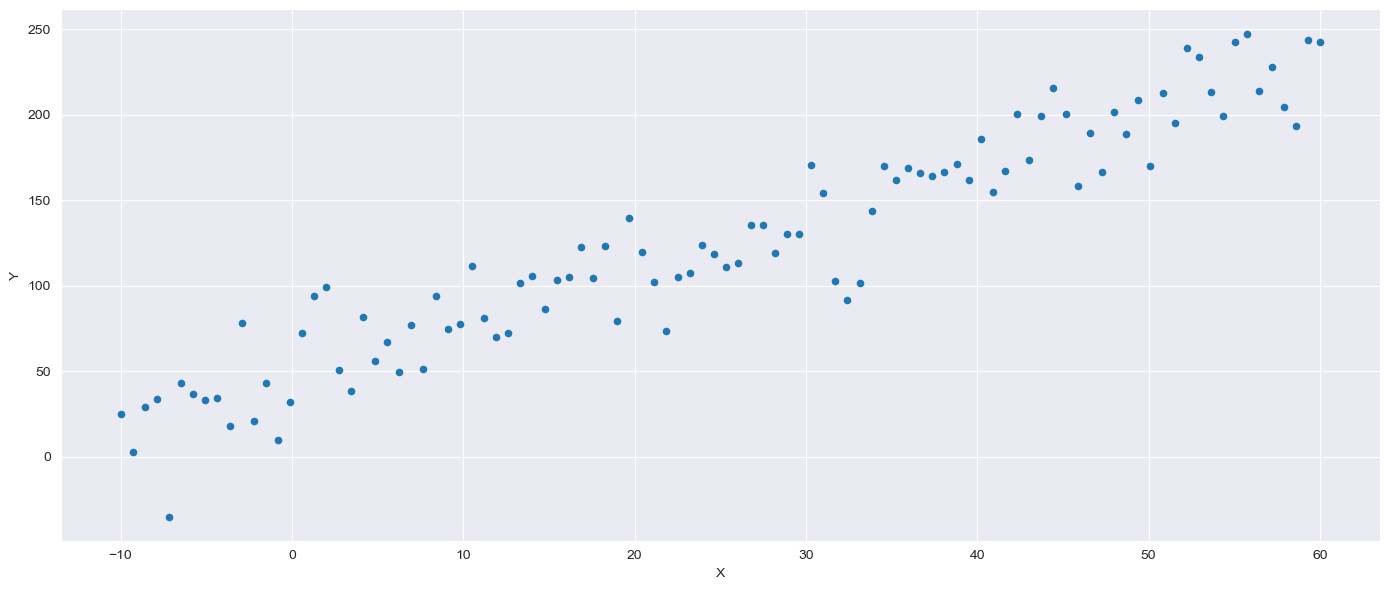

In [5]:
# On a crée les données, maintenant on les affiche 
# on crée une variable 'ax' pour 'axes' et dans cette variable on prend notre dataframe qui s'appelle
# 'data', on lui demande de dessiner '.plot' (en Anglais toujours) un dessin de type '.scatter'
# qui signifie 'nuage de points' in English of course, et dans les paranthèses on pécise à quoi doit
# ressembler notre 'scatter', on lui donne les 'x', les 'y' et aussi on donne une taille au graphique
# avec la méthode (fonction) figsize. Vous pouvez vous amuser à changer la taille (14,6)
ax = data.plot.scatter(x='X', y='Y', figsize=(14,6))
sns.despine() # enlève les bordures du graphique (optionnel bien sûr)
plt.tight_layout() # Cette fonction ajuste automatiquement les espacements entre les sous-graphiques
# dans une figure, de manière à ce que le graphique soit bien ajusté et clairement lisible.

Regardez ci-dessous si lorsque je crée la variable 'y' je ne génère pas un aléa probabiliste
lancez la cellule et vous verrez à quoi ressemblent mon graphique et mes points

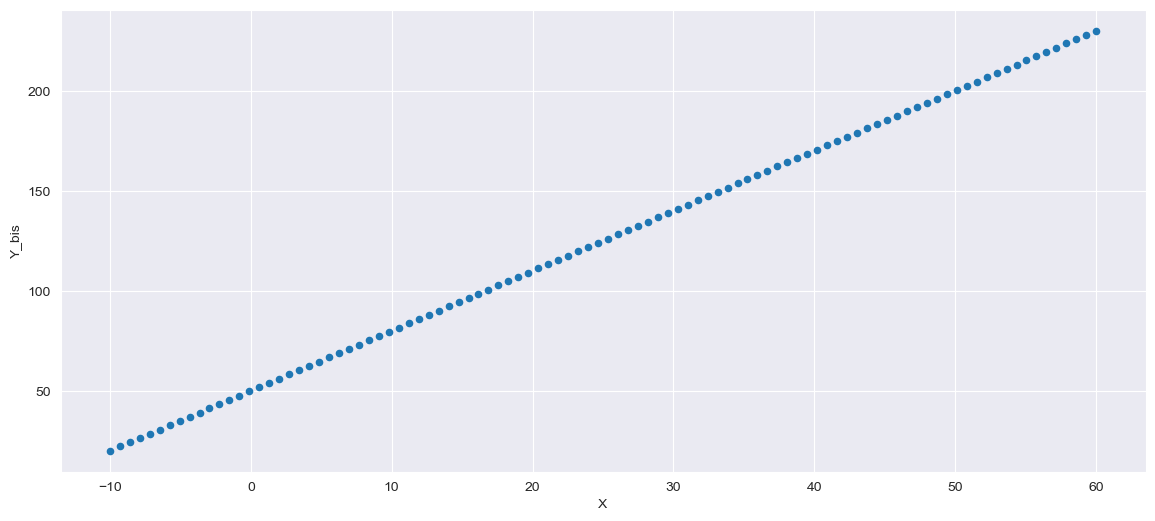

In [6]:
y_bis = 50 + 3 * x 
data_bis = pd.DataFrame({'X':x, 'Y_bis':y_bis})
ax_bis = data_bis.plot.scatter(x='X', y='Y_bis', figsize=(14,6))

#### Maintenant avec statsmodels on va estimer une régression linéaire, c'est à dire une doite qui nous permettra de réaliser des prédiction pour nos points. Autrement dit, admettons que nous disposions d'une série de points observés en bourse comme des ratio PER par exemple et qu'il nous semble à l'oeil nu qu'il existe une tendance de fond linéaire, alors notre module statsmodels va nous aider à estimer la meilleur droite possible (régression) qui nous permettra de réaliser des prédictions de ratio PER

In [7]:
# On précise à statsmodels 'sm' que dans notre droite de régression on veut une constante
# une ordonnée à l'origine, vous vous souvenez ? Dans une équation de droite de type y = ax + b
# le 'b' est la constante et plus précisément c'est l'ordonnée à l'origine, en Français : la valeur
# de 'y' quand la droite coupe l'axe 'y'
X = sm.add_constant(data['X'])

# On utilise le module statsmodels 'sm' pour lui demander en Anglais de nous créer la meilleur droite de
# régression OLS pour Ordinary Least Square, on lui donne entre paranthèses les données sur lesquelles
# réaliser ces calculs, avec avec la méthode (fonction) (.fit()) on lui dit : vas-y lance les calculs
model = sm.OLS(data['Y'], X).fit()

# On imprime le résumé de tout ce qu'a calculé statsmodels
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           1.87e-51
Time:                        10:41:27   Log-Likelihood:                -444.00
No. Observations:                 100   AIC:                             892.0
Df Residuals:                      98   BIC:                             897.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.3600      3.277     14.454      0.0

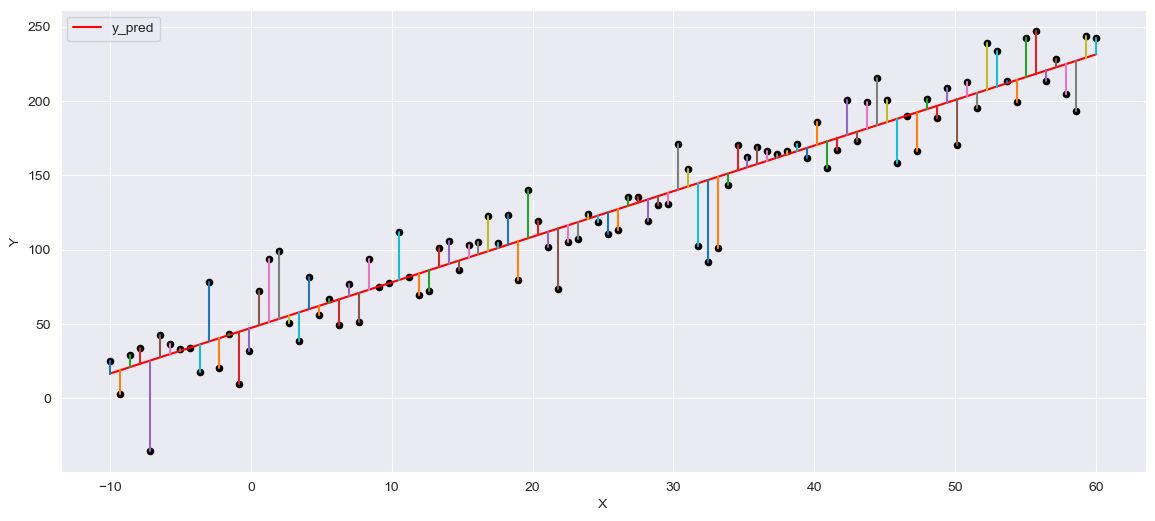

In [60]:
# notre objet 'model' calculé avec le module statsmodels dans la cellule précédente
# contient un ensemble d'informations qu'on peut utiliser, afficher, etc...
# par exemple il contient la meilleures prédictions possibles de 'y' étant donné qu'on a réalisé
# une régression linéaire. Il serait intéressant d'utiliser ces meilleures prédictions et de les
# tracer sur un graphique. Elles auront l'allure d'une droite si on relie les points entre eux.
# En effet, nous avons calculé une regression linéaire. Nous nous attendons donc à tracer la meilleure
# droite qui minimise les résidus et qui nous permettra de réaliser la meilleures prédiction linéaire
# possible.
# Nous commençon par récupérer ces prédictions de 'y' pour les ajouter à notre dataframe
# dans une colonne que nous appelerons 'y_pred' avec le code suivant :
data['y_pred'] = model.predict()

# Nous pouvons aussi récupérer les résidus (l'espace entre la droite de régression et les points)
# entre les ajoutant aussi à notre dataframe dans une colonne nommée 'residus'
data['residus'] = model.resid

# Ceci étant fait, nous allons dessiner tout celà. nous pourrions directement tracer un graphique
# avec le code suivant data.plot.scatter(x='X', y='Y', c='black', figsize=(14,6))
# mais nous allons plutôt mettre ce code qui permet de tracer un graphique dans une variable nommée
# ax car si nous voulons ajouter au graphique une ligne ou autre chose, nous pourrons le faire plus
# facilement en utilisant cette variable et en l'ajoutant à un 2ème graphique pour que les 2 se combinent
ax = data.plot.scatter(x='X', y='Y', c='black', figsize=(14,6))

# Justement nous ajoutons au graphique créé une ligne avec la méthode (fonction) .line dont la traduction
# littérale est 'ligne'. Cette ligne doit utiliser les coordonnées 'X' de base mais pas les coordonnées
# 'Y' de base. En effet, nous utilisons les 'y_pred' qui sont nos prédictions linéaires.
# pour ajouter cette ligne, nous utilisons encore la méthode .plot avec en plus .line et surtout
# entre paranthèses nous précisons nos coordonnées et ax=ax pour dire qu'il existe déjà un premier
# graphique créé et que nous ajoutons la ligne à ce grahique existant. color='red' définit simplement
# la couleur de la ligne comme rouge.
data.plot.line(x='X', y='y_pred', ax=ax, color='red')

# print(data.iterrows)
# la méthode .iterrows() itère sur toutes les lignes du dataframe


# On aurait pu s'arrêter là mais ça serait cool de pouvoir tracer une petite ligne entre
# les points X et la droite de régression pour observer visuellement les résidus, leur taille.
# pour celà sans trop rentrer dans les détails on va itérer sur chaque ligne du datafram
# et on va donner à la méthode .plot (celle qui permet de tracer, dessiner) en argument non pas
# les simples coordonnées mais des coordonnées sous forme de tuple ! Qu'est-ce qu'un tuple ? 
# C'est un objet qui contient des données entre paranthèse tout simplement. ex: (1,2) est un tuple.
# Pourquoi faire celà ? Parceque quand on donne à la méthode .plot un tuple, la méthode .plot
# par défaut va tracer une ligne qui relie les points entre eux. Du coup vous aurez bien sur votre
# graphique les points de coordonnées (X,Y) reliés aux points de coordonnées (X,y_pred) et nous
# aurons réussi à relier nos résidus à la droite de régression. Il existe très certainement d'autres
# façons de le faire, à vous de décourvir
for index, ligne in data.iterrows():
    plt.plot((ligne.X, ligne.X), (ligne.Y, ligne['y_pred'])) 
    # quand on lui donne des tuples avec des coordonnées différentes, automatiquement
    # il va les relier par des traits

#### Dans la section précédente nous avons utilisé la régression linéaire en 2 dimensions avec une seule variable X et une variable Y. C'était une façon de dire : ma variable X explique ma variable Y. Mais dans la vraie vie il est possible que 2 variables X expliquent la variable Y. Par exemple : si mon niveau de performance demain matin à un footing est la variable 'y', alors il est possible que si j'ai passé une bonne nuit de sommeil (ma variable 'x') mon niveau soit bon. Mais si j'ai passé une mauvaise nuit de sommeil (variable x) et que j'ai bu de l'alcool toute la soirée (variable z) alors mon footing peut devenir très mauvais. Dans ce cas nous avons 2 variables qui expliquent ma performance au footing : la variable 'x' (nuit de sommeil) et la variable 'z' (quantité d'alcool ingérée hier soir)

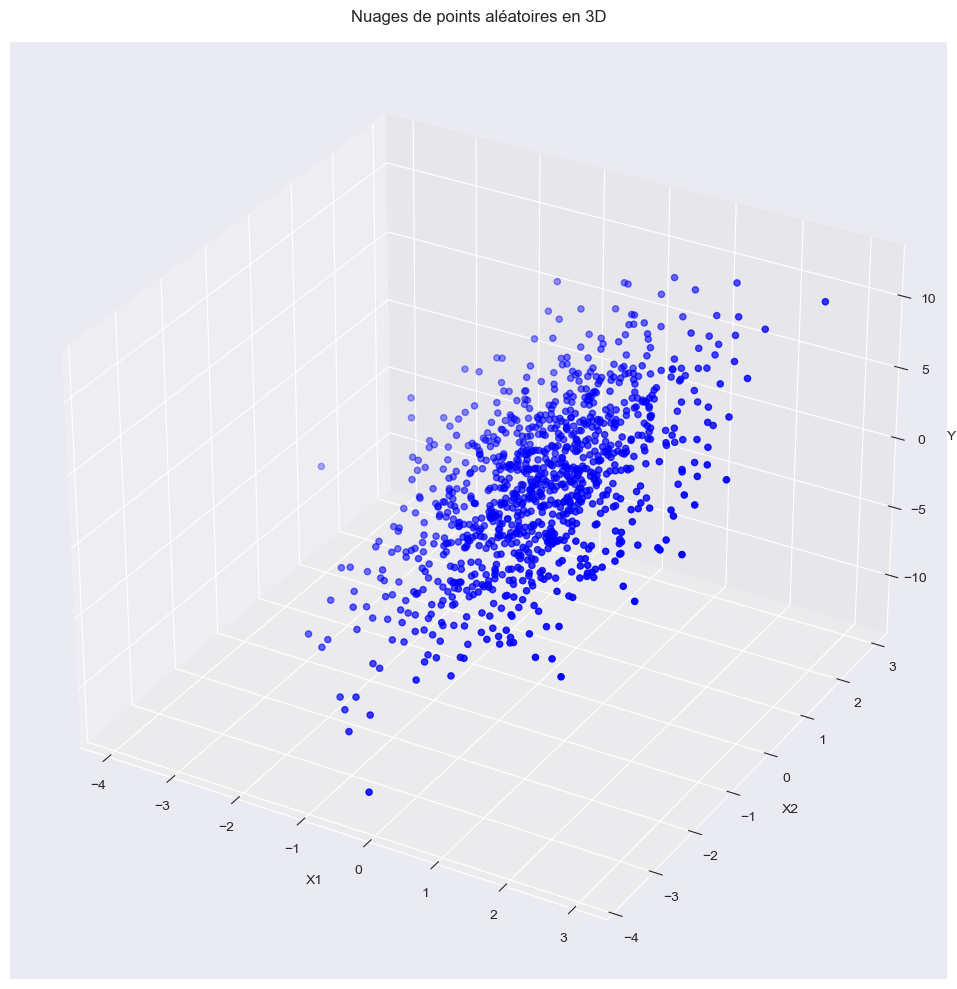

In [90]:
nombre = 1000

X1 = np.random.randn(nombre)
X2 = np.random.randn(nombre)

Y = 2*X1 + 3*X2 + np.random.randn(1000)*0.5

fig = plt.figure(figsize=(12, 10)) # caractéristiques de notre graphique

# on ajoute une sous graphique à notre objet fig (le grpahique principal)
# la spécification 111 signifie qu'on veut afficher le tout sur 1 ligne et 1 colonne et qu'on veut
# sélectionner le premier graphique crée (le dernier 1)
# cette spécification est très utilise so on veut subdiviser la sortie en plusieurs zones avec 
#  plusieurs grahiques. Par exemple spécifier 211 voudrait dire qu'on veut en sortie 2 lignes, 1 colonne
# et on sélectionne le premier graphique 
# ensuite on spécifie qu'on veut une projection en 3d
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, color='blue', marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

ax.set_title('Nuages de points aléatoires en 3D', pad=15) # pad pour le décalage par rapport au sommet

plt.tight_layout()
plt.show()